In [1]:
'''
plots OE steps for an individual pixel written out by 'write_test'


Variable Order:
    1-30:  Rain Water Content [g/m^3]
    31-60: Ice Water Content [g/m^3]
    61:    Log10 of Cloud Water Path  [g/m^2]
    62:    DSD mu
    63:    Snow Particle Density [g/cm^3]
    64:    EOF1
    65:    SST [K]
    66:    Wind Speed [m/s]
'''

import numpy as np
import matplotlib.pyplot as plt

In [2]:
radar_stat = 0

hgt = np.arange(14750,0,-500)

def read_test(file):

    nlyrs = 30

    nn   = 25

    n = {}
    Fout = {}
    Fout_post = {}
    x2 = {}
    xnext = {}
    K = {}
    sx_i = {}
    sx   = {}
    chisqtot = {}
    chisq = {}
    disq = {}

    with open(file, 'rb') as f:
        oepix   = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nvar    = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nretvar = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nobs    = np.fromfile(f, sep='', count=1, dtype='i')[0]

        sa      = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
        psy     = np.fromfile(f, sep='', count=nobs*nobs, dtype='f8').reshape(nobs,nobs).T
        xa      = np.fromfile(f, sep='', count=nretvar, dtype='f')
        mrmp    = np.fromfile(f, sep='', count=nlyrs, dtype='f')
        peofs   = np.fromfile(f, sep='', count=nlyrs*6, dtype='f').reshape(6,nlyrs).T
        y       = np.fromfile(f, sep='', count=nobs, dtype='f')
        frzl    = np.fromfile(f, sep='', count=1, dtype='f')
        frzl_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
        cltop_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
        clbot_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]

        for i in np.arange(0,nn):
            try:
                n[f'n{i+1}'] = np.fromfile(f, sep='', count=1, dtype='i')[0]
            except:
                print(f'End of file at iteration {i}')
                break

            x2[f'x2_{i+1}']     = np.fromfile(f, sep='', count=nvar, dtype='f')
            Fout[f'Fout_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
            K[f'K_{i+1}']       = np.fromfile(f, sep='', count=nobs*nretvar, dtype='f8').reshape(nretvar,nobs).T
            sx_i[f'sx_i_{i+1}'] = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
            sx[f'sx_{i+1}']     = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
            xnext[f'xnext_{i+1}'] = np.fromfile(f, sep='', count=nretvar, dtype='f')
            chisqtot[f'chisqtot_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
            chisq[f'chisq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
            Fout_post[f'Fout_post_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
            if i > 0:
                disq[f'disq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype=float)
                iter_mincost        = np.fromfile(f, sep='', count=1, dtype='i')[0]




    last = i
    print('Pixel: ', oepix)
    print('Converged at iteration: ', iter_mincost)
    
    return Fout, y, iter_mincost, frzl


def read_test_prcp(file):

    nlyrs = 30

    nn   = 25

    n = {}
    Fout = {}
    Fout_post = {}
    x2 = {}
    xnext = {}
    K = {}
    sx_i = {}
    sx   = {}
    chisqtot = {}
    chisq = {}
    disq = {}
    rn_rate = {}
    sn_rate = {}

    with open(file, 'rb') as f:
        oepix   = np.fromfile(f, sep='', count=1, dtype='i')[0]
        prcp_in = np.fromfile(f, sep='', count=1, dtype='f')[0]
        snrt_sfc_in = np.fromfile(f, sep='', count=1, dtype='f')[0]
        nvar    = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nretvar = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nobs    = np.fromfile(f, sep='', count=1, dtype='i')[0]

        sa      = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
        psy     = np.fromfile(f, sep='', count=nobs*nobs, dtype='f8').reshape(nobs,nobs).T
        xa      = np.fromfile(f, sep='', count=nretvar, dtype='f')
        mrmp    = np.fromfile(f, sep='', count=nlyrs, dtype='f')
        peofs   = np.fromfile(f, sep='', count=nlyrs*6, dtype='f').reshape(6,nlyrs).T
        y       = np.fromfile(f, sep='', count=nobs, dtype='f')
        frzl    = np.fromfile(f, sep='', count=1, dtype='f')
        frzl_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
        cltop_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
        clbot_bin = np.fromfile(f, sep='', count=1, dtype='i')[0]
    
        for i in np.arange(0,nn):
            try:
                n[f'n{i+1}'] = np.fromfile(f, sep='', count=1, dtype='i')[0]
            except:
                print(f'End of file at iteration {i}')
                break

            x2[f'x2_{i+1}']     = np.fromfile(f, sep='', count=nvar, dtype='f')
            Fout[f'Fout_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
            K[f'K_{i+1}']       = np.fromfile(f, sep='', count=nobs*nretvar, dtype='f8').reshape(nretvar,nobs).T
            sx_i[f'sx_i_{i+1}'] = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
            sx[f'sx_{i+1}']     = np.fromfile(f, sep='', count=nretvar*nretvar, dtype='f8').reshape(nretvar,nretvar).T
            xnext[f'xnext_{i+1}'] = np.fromfile(f, sep='', count=nretvar, dtype='f')
            chisqtot[f'chisqtot_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
            chisq[f'chisq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype='f')
            Fout_post[f'Fout_post_{i+1}'] = np.fromfile(f, sep='', count=nobs, dtype='f')
            rn_rate[f'rn_rate_{i+1}'] = np.fromfile(f, sep='', count=nlyrs, dtype='f')
            sn_rate[f'sn_rate_{i+1}'] = np.fromfile(f, sep='', count=nlyrs, dtype='f')

            if i > 0:
                disq[f'disq_{i+1}'] = np.fromfile(f, sep='', count=1, dtype=float)
                iter_mincost        = np.fromfile(f, sep='', count=1, dtype='i')[0]

        

    last = i
    print('Pixel: ', oepix)
    print('Converged at iteration: ', iter_mincost)
    print('Sfc precip in: ', prcp_in)
    print('Sfc snowfall in: ', snrt_sfc_in)
    
    return Fout, y, iter_mincost, frzl

In [3]:
case1_normcmb_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/test_case1_normcmb.bin'
case1_rdmonly_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/test_case1_rdmonly.bin'
case1_rdronly_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/test_case1_rdronly.bin'
case2_normcmb_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/test_case2_normcmb.bin'
case2_rdmonly_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/test_case2_rdmonly.bin'
case2_rdronly_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/test_case2_rdronly.bin'
case3_normcmb_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/test_case3_normcmb.bin'
case3_rdmonly_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/test_case3_rdmonly.bin'
case3_rdronly_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/test_case3_rdronly.bin'
case4_normcmb_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_prcp/test_oepix_snow.bin'

Fout_normcmb_case1, y_case1, n_normcmb_case1, frzl_case1 = read_test(case1_normcmb_file)
Fout_rdmonly_case1, y_case1, n_rdmonly_case1, frzl_case1 = read_test(case1_rdmonly_file)
Fout_rdronly_case1, y_case1, n_rdronly_case1, frzl_case1 = read_test(case1_rdronly_file)
Fout_normcmb_case2, y_case2, n_normcmb_case2, frzl_case2 = read_test(case2_normcmb_file)
Fout_rdmonly_case2, y_case2, n_rdmonly_case2, frzl_case2 = read_test(case2_rdmonly_file)
Fout_rdronly_case2, y_case2, n_rdronly_case2, frzl_case2 = read_test(case2_rdronly_file)
Fout_normcmb_case3, y_case3, n_normcmb_case3, frzl_case3 = read_test(case3_normcmb_file)
Fout_rdmonly_case3, y_case3, n_rdmonly_case3, frzl_case3 = read_test(case3_rdmonly_file)
Fout_rdronly_case3, y_case3, n_rdronly_case3, frzl_case3 = read_test(case3_rdronly_file)
Fout_normcmb_case4, y_case4, n_normcmb_case4, frzl_case4 = read_test_prcp(case4_normcmb_file)

End of file at iteration 4
Pixel:  100
Converged at iteration:  4
End of file at iteration 5
Pixel:  100
Converged at iteration:  5
End of file at iteration 3
Pixel:  100
Converged at iteration:  3
End of file at iteration 4
Pixel:  468
Converged at iteration:  4
End of file at iteration 6
Pixel:  468
Converged at iteration:  6
End of file at iteration 2
Pixel:  468
Converged at iteration:  2
End of file at iteration 5
Pixel:  377
Converged at iteration:  5
End of file at iteration 3
Pixel:  377
Converged at iteration:  3
End of file at iteration 7
Pixel:  377
Converged at iteration:  6
End of file at iteration 3
Pixel:  240
Converged at iteration:  3
Sfc precip in:  0.0
Sfc snowfall in:  0.021018773


In [4]:
nobs = 40
sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/sy/sy_cloudy.mtrx'
with open(sy_file,'rb') as f:
    sy = np.fromfile(f, sep='', count=-1, dtype='f').reshape(nobs,nobs)
    
errs = np.zeros(nobs)
for i in np.arange(0,nobs):
    errs[i] = sy[i,i]

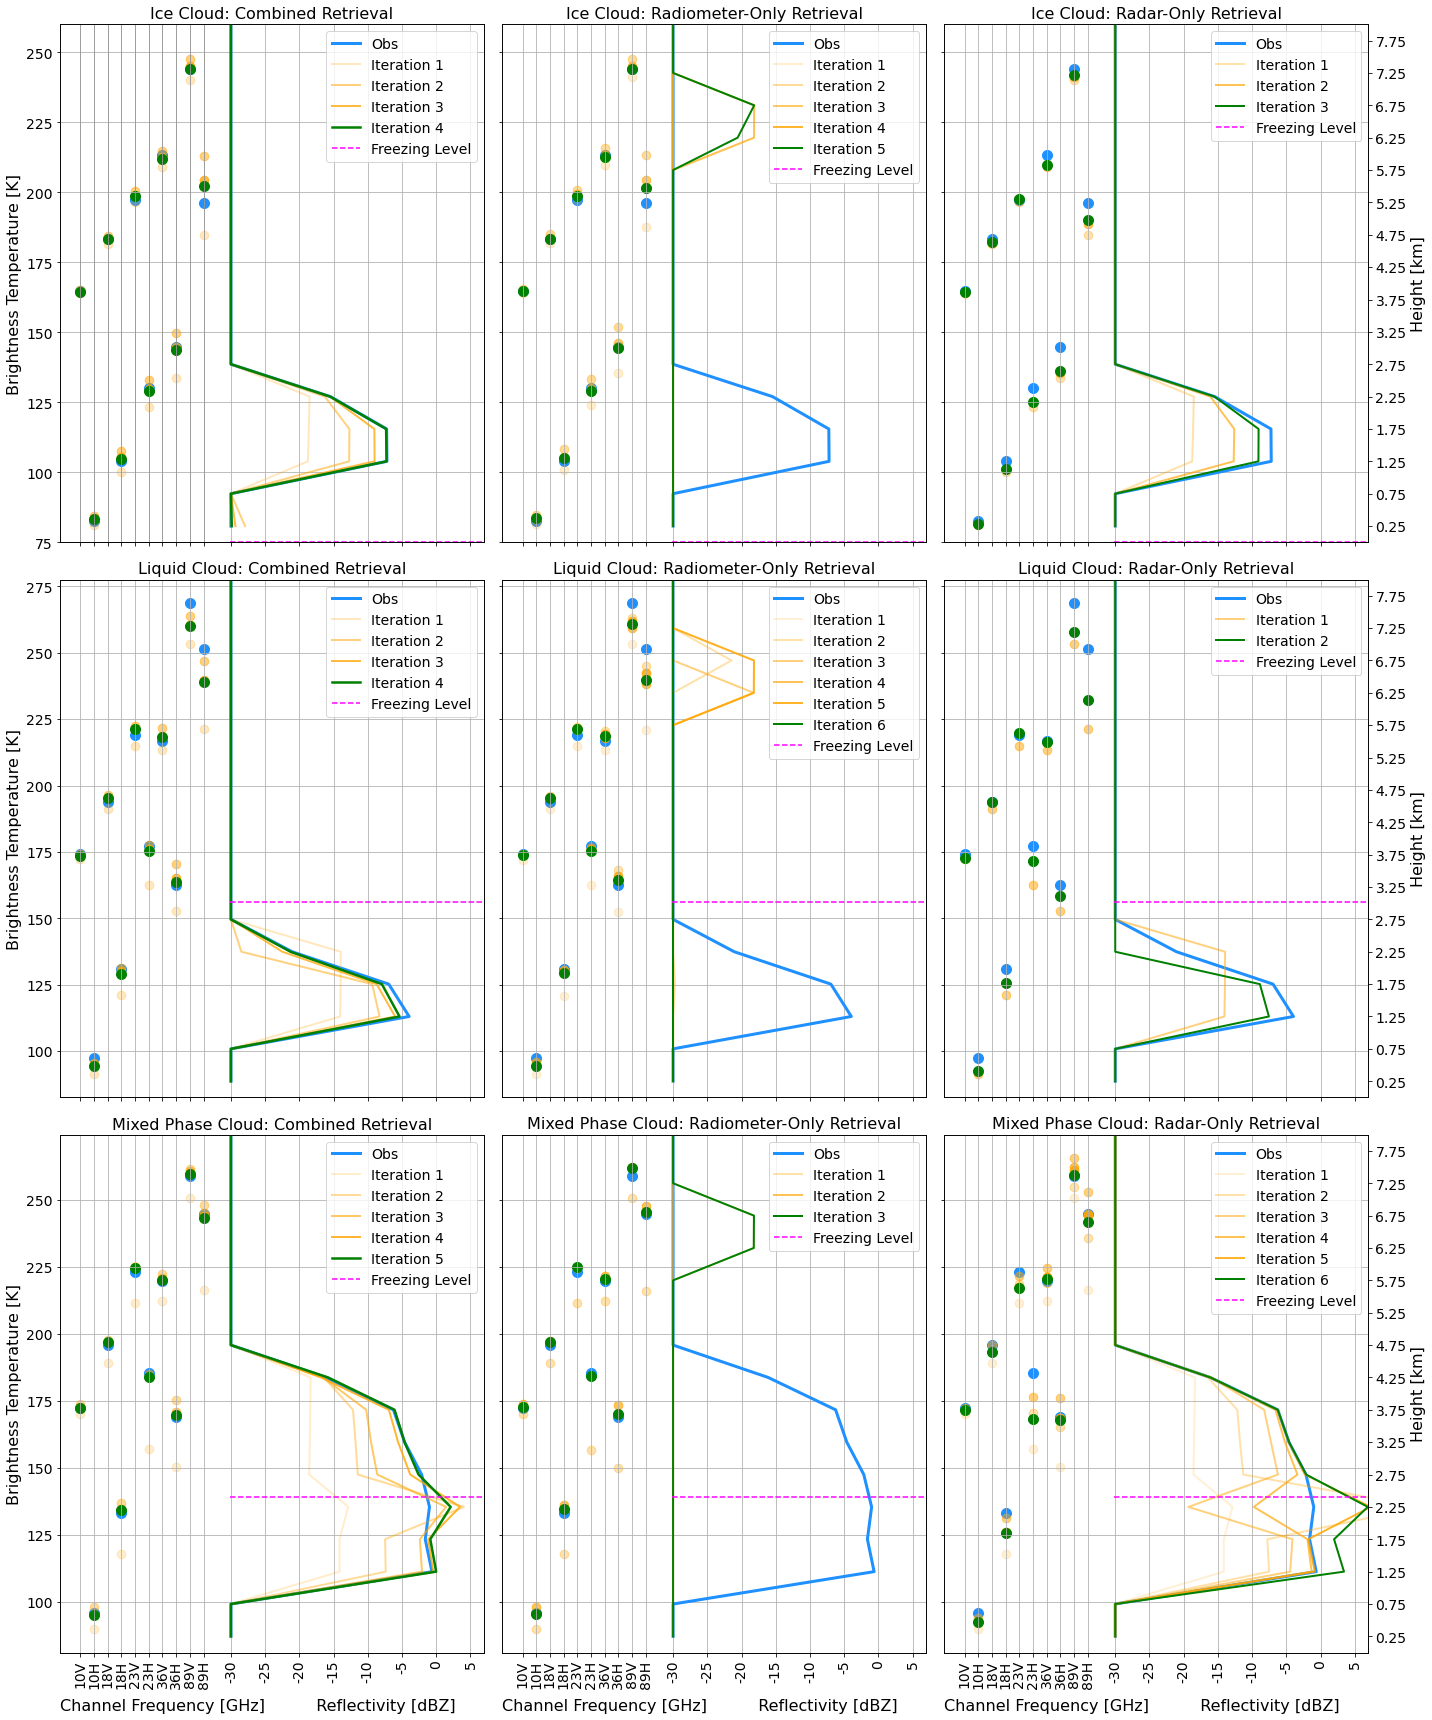

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[20,24], tight_layout=True, sharex=True, sharey='row')

ax1l = ax[0,0]
ax1r = ax[0,0].twinx()
ax2l = ax[0,1]
ax2r = ax[0,1].twinx()
ax3l = ax[0,2]
ax3r = ax[0,2].twinx()
ax4l = ax[1,0]
ax4r = ax[1,0].twinx()
ax5l = ax[1,1]
ax5r = ax[1,1].twinx()
ax6l = ax[1,2]
ax6r = ax[1,2].twinx()
ax7l = ax[2,0]
ax7r = ax[2,0].twinx()
ax8l = ax[2,1]
ax8r = ax[2,1].twinx()
ax9l = ax[2,2]
ax9r = ax[2,2].twinx()


ax1l.scatter(np.arange(-52,-32,2),y_case1[0:10],s=100,label='Obs', color='dodgerblue')
ax2l.scatter(np.arange(-52,-32,2),y_case1[0:10],s=100,label='Obs', color='dodgerblue')
ax3l.scatter(np.arange(-52,-32,2),y_case1[0:10],s=100,label='Obs', color='dodgerblue')
ax4l.scatter(np.arange(-52,-32,2),y_case2[0:10],s=100,label='Obs', color='dodgerblue')
ax5l.scatter(np.arange(-52,-32,2),y_case2[0:10],s=100,label='Obs', color='dodgerblue')
ax6l.scatter(np.arange(-52,-32,2),y_case2[0:10],s=100,label='Obs', color='dodgerblue')
ax7l.scatter(np.arange(-52,-32,2),y_case3[0:10],s=100,label='Obs', color='dodgerblue')
ax8l.scatter(np.arange(-52,-32,2),y_case3[0:10],s=100,label='Obs', color='dodgerblue')
ax9l.scatter(np.arange(-52,-32,2),y_case3[0:10],s=100,label='Obs', color='dodgerblue')

ax1r.plot(y_case1[10:],hgt,linewidth=3,label='Obs', color='dodgerblue')
ax2r.plot(y_case1[10:],hgt,linewidth=3,label='Obs', color='dodgerblue')
ax3r.plot(y_case1[10:],hgt,linewidth=3,label='Obs', color='dodgerblue')
ax4r.plot(y_case2[10:],hgt,linewidth=3,label='Obs', color='dodgerblue')
ax5r.plot(y_case2[10:],hgt,linewidth=3,label='Obs', color='dodgerblue')
ax6r.plot(y_case2[10:],hgt,linewidth=3,label='Obs', color='dodgerblue')
ax7r.plot(y_case3[10:],hgt,linewidth=3,label='Obs', color='dodgerblue')
ax8r.plot(y_case3[10:],hgt,linewidth=3,label='Obs', color='dodgerblue')
ax9r.plot(y_case3[10:],hgt,linewidth=3,label='Obs', color='dodgerblue')

##############################

#---Plot1

alpha = 0
color='orange'
size = 75
linewidth=2
last = n_normcmb_case1
for i in np.arange(0,last):
    alpha = alpha + 1./last
    if i == last - 1:
        color = 'green'
        alpha = 1.
        size  = 100
        linewidth=2.5
    ax1l.scatter(np.arange(-52,-32,2), Fout_normcmb_case1[f'Fout_{i+1}'][0:10], color=color, alpha=alpha,
                 label=f'Iteration {i+1}', s=size)
    ax1r.plot(Fout_normcmb_case1[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, 
             linewidth=linewidth,label=f'Iteration {i+1}')
#---Plot2
alpha = 0
color='orange'
size = 75
linewidth=2
last = n_rdmonly_case1
for i in np.arange(0,last):
    alpha = alpha + 1./last
    if i == last - 1:
        color = 'green'
        alpha = 1.
        size  = 100
    ax2l.scatter(np.arange(-52,-32,2), Fout_rdmonly_case1[f'Fout_{i+1}'][0:10], color=color, alpha=alpha,
                 label=f'Iteration {i+1}', s=size)
    ax2r.plot(Fout_rdmonly_case1[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, 
             linewidth=linewidth,label=f'Iteration {i+1}')  
#---Plot3
alpha = 0
color='orange'
size = 75
linewidth=2
last = n_rdronly_case1
for i in np.arange(0,last):
    alpha = alpha + 1./last
    if i == last - 1:
        color = 'green'
        alpha = 1.
        size  = 100
    ax3l.scatter(np.arange(-52,-32,2), Fout_rdronly_case1[f'Fout_{i+1}'][0:10], color=color, alpha=alpha,
                 label=f'Iteration {i+1}', s=size)
    ax3r.plot(Fout_rdronly_case1[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, 
             linewidth=linewidth,label=f'Iteration {i+1}') 
    
#---Plot4
alpha = 0
color='orange'
size = 75
linewidth=2
last = n_normcmb_case2
for i in np.arange(0,last):
    alpha = alpha + 1./last
    if i == last - 1:
        color = 'green'
        alpha = 1.
        size  = 100
        linewidth=2.5
    ax4l.scatter(np.arange(-52,-32,2), Fout_normcmb_case2[f'Fout_{i+1}'][0:10], color=color, alpha=alpha,
                 label=f'Iteration {i+1}', s=size)
    ax4r.plot(Fout_normcmb_case2[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, 
             linewidth=linewidth,label=f'Iteration {i+1}')
#---Plot5
alpha = 0
color='orange'
size = 75
linewidth=2
last = n_rdmonly_case2
for i in np.arange(0,last):
    alpha = alpha + 1./last
    if i == last - 1:
        color = 'green'
        alpha = 1.
        size  = 100
    ax5l.scatter(np.arange(-52,-32,2), Fout_rdmonly_case2[f'Fout_{i+1}'][0:10], color=color, alpha=alpha,
                 label=f'Iteration {i+1}', s=size)
    ax5r.plot(Fout_rdmonly_case2[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, 
             linewidth=linewidth,label=f'Iteration {i+1}')    
#---Plot6
alpha = 0
color='orange'
size = 75
linewidth=2
last = n_rdronly_case2
for i in np.arange(0,last):
    alpha = alpha + 1./last
    if i == last - 1:
        color = 'green'
        alpha = 1.
        size  = 100
    ax6l.scatter(np.arange(-52,-32,2), Fout_rdronly_case2[f'Fout_{i+1}'][0:10], color=color, alpha=alpha,
                 label=f'Iteration {i+1}', s=size)
    ax6r.plot(Fout_rdronly_case2[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, 
             linewidth=linewidth,label=f'Iteration {i+1}') 
#---Plot7
alpha = 0
color='orange'
size = 75
linewidth=2
last = n_normcmb_case3
for i in np.arange(0,last):
    alpha = alpha + 1./last
    if i == last - 1:
        color = 'green'
        alpha = 1.
        size  = 100
        linewidth=2.5
    ax7l.scatter(np.arange(-52,-32,2), Fout_normcmb_case3[f'Fout_{i+1}'][0:10], color=color, alpha=alpha,
                 label=f'Iteration {i+1}', s=size)
    ax7r.plot(Fout_normcmb_case3[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, 
             linewidth=linewidth,label=f'Iteration {i+1}')
#---Plot8
alpha = 0
color='orange'
size = 75
linewidth=2
last = n_rdmonly_case3
for i in np.arange(0,last):
    alpha = alpha + 1./last
    if i == last - 1:
        color = 'green'
        alpha = 1.
        size  = 100
    ax8l.scatter(np.arange(-52,-32,2), Fout_rdmonly_case3[f'Fout_{i+1}'][0:10], color=color, alpha=alpha,
                 label=f'Iteration {i+1}', s=size)
    ax8r.plot(Fout_rdmonly_case3[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, 
             linewidth=linewidth,label=f'Iteration {i+1}')  
#---Plot9
alpha = 0
color='orange'
size = 75
linewidth=2
last = n_rdronly_case3
for i in np.arange(0,last):
    alpha = alpha + 1./last
    if i == last - 1:
        color = 'green'
        alpha = 1.
        size  = 100
    ax9l.scatter(np.arange(-52,-32,2), Fout_rdronly_case3[f'Fout_{i+1}'][0:10], color=color, alpha=alpha,
                 label=f'Iteration {i+1}', s=size)
    ax9r.plot(Fout_rdronly_case3[f'Fout_{i+1}'][10:], hgt, color=color, alpha=alpha, 
             linewidth=linewidth,label=f'Iteration {i+1}')
    


    
#######################


ax1l.tick_params('both', labelsize=14)
ax2l.tick_params('both', labelsize=14)
ax3r.tick_params('both', labelsize=14)
ax4l.tick_params('both', labelsize=14)
ax5l.tick_params('both', labelsize=14)
ax6r.tick_params('both', labelsize=14)
ax7l.tick_params('both', labelsize=14)
ax8l.tick_params('both', labelsize=14)
ax9l.tick_params('both', labelsize=14)

xlabels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H',
              '-30', '-25', '-20', '-15', '-10', '-5', '0', '5' ]

ax7l.set_xticks([-52,-50,-48,-46,-44,-42,-40,-38,-36,-34,-30,-25,-20,-15,-10,-5,0,5],
               xlabels,
               rotation=90)
ax8l.set_xticks([-52,-50,-48,-46,-44,-42,-40,-38,-36,-34,-30,-25,-20,-15,-10,-5,0,5],
                xlabels,
               rotation=90)
ax9l.set_xticks([-52,-50,-48,-46,-44,-42,-40,-38,-36,-34,-30,-25,-20,-15,-10,-5,0,5],
               xlabels,
               rotation=90)





for i in np.arange(-52,-32,2): ax1l.axvline(i, color='gray', linewidth=0.5)
    
ax1r.axhline(frzl_case1, linestyle='--', color='magenta', label='Freezing Level', xmin=0.40)
ax2r.axhline(frzl_case1, linestyle='--', color='magenta', label='Freezing Level', xmin=0.40)
ax3r.axhline(frzl_case1, linestyle='--', color='magenta', label='Freezing Level', xmin=0.40)
ax4r.axhline(frzl_case2, linestyle='--', color='magenta', label='Freezing Level', xmin=0.40)
ax5r.axhline(frzl_case2, linestyle='--', color='magenta', label='Freezing Level', xmin=0.40)
ax6r.axhline(frzl_case2, linestyle='--', color='magenta', label='Freezing Level', xmin=0.40)
ax7r.axhline(frzl_case3, linestyle='--', color='magenta', label='Freezing Level', xmin=0.40)
ax8r.axhline(frzl_case3, linestyle='--', color='magenta', label='Freezing Level', xmin=0.40)
ax9r.axhline(frzl_case3, linestyle='--', color='magenta', label='Freezing Level', xmin=0.40)

ax1r.set_yticks([])
ax2r.set_yticks([])
ax4r.set_yticks([])
ax5r.set_yticks([])
ax7r.set_yticks([])
ax8r.set_yticks([])


ax3r.set_yticks(hgt,hgt/1000., fontsize=14)
ax6r.set_yticks(hgt,hgt/1000., fontsize=14)
ax9r.set_yticks(hgt,hgt/1000., fontsize=14)
ax1r.set_ylim(0,8000)
ax2r.set_ylim(0,8000)
ax3r.set_ylim(0,8000)
ax4r.set_ylim(0,8000)
ax5r.set_ylim(0,8000)
ax6r.set_ylim(0,8000)
ax7r.set_ylim(0,8000)
ax8r.set_ylim(0,8000)
ax9r.set_ylim(0,8000)


ax1l.grid()
ax2l.grid()
ax3l.grid()
ax4l.grid()
ax5l.grid()
ax6l.grid()
ax7l.grid()
ax8l.grid()
ax9l.grid()


ax7l.set_xlabel('Channel Frequency [GHz]          Reflectivity [dBZ]',
                fontsize=16, labelpad=10, loc='left')
ax8l.set_xlabel('Channel Frequency [GHz]          Reflectivity [dBZ]',
                fontsize=16, labelpad=10, loc='left')
ax9l.set_xlabel('Channel Frequency [GHz]          Reflectivity [dBZ]',
                fontsize=16, labelpad=10, loc='left')
ax1l.set_ylabel('Brightness Temperature [K]', fontsize=16)
ax4l.set_ylabel('Brightness Temperature [K]', fontsize=16)
ax7l.set_ylabel('Brightness Temperature [K]', fontsize=16)
ax3r.set_ylabel('Height [km]', fontsize=16)
ax6r.set_ylabel('Height [km]', fontsize=16)
ax9r.set_ylabel('Height [km]', fontsize=16)
ax1r.set_xlim(-55,7)
ax1l.set_ylim(75,260)
ax1r.legend(fontsize=14)
ax2r.legend(fontsize=14)
ax3r.legend(fontsize=14)
ax4r.legend(fontsize=14)
ax5r.legend(fontsize=14)
ax6r.legend(fontsize=14)
ax7r.legend(fontsize=14)
ax8r.legend(fontsize=14)
ax9r.legend(fontsize=14)
ax1l.set_title('Ice Cloud: Combined Retrieval', fontsize=16)
ax2l.set_title('Ice Cloud: Radiometer-Only Retrieval', fontsize=16)
ax3l.set_title('Ice Cloud: Radar-Only Retrieval', fontsize=16)
ax4l.set_title('Liquid Cloud: Combined Retrieval', fontsize=16)
ax5l.set_title('Liquid Cloud: Radiometer-Only Retrieval', fontsize=16)
ax6l.set_title('Liquid Cloud: Radar-Only Retrieval', fontsize=16)
ax7l.set_title('Mixed Phase Cloud: Combined Retrieval', fontsize=16)
ax8l.set_title('Mixed Phase Cloud: Radiometer-Only Retrieval', fontsize=16)
ax9l.set_title('Mixed Phase Cloud: Radar-Only Retrieval', fontsize=16)

plt.show()